In [9]:
!pip install sklearn_relief

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# !pip install fuzzy-c-means

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, auc, roc_auc_score, roc_curve

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.cluster import KMeans

from google.colab import drive
from itertools import cycle

In [2]:
drive.mount('/content/drive', force_remount=True)
location ='drive/MyDrive/ML-Dataset/final/'
list_of_files = os.listdir(location)

Mounted at /content/drive


In [3]:
df= pd.read_csv(location+'bank-database.csv', sep = ',')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df = df.drop(["duration"],axis=1)

df['job'].replace(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'],
                        [0, 1, 2, 3, 4 ,5 ,6 ,7 ,8 ,9 ,1, 11], inplace=True)
df['marital'].replace(['divorced', 'married', 'single', 'unknown'],
                        [0, 1, 2, 3], inplace=True)
df['education'].replace(['basic.4y', 'basic.6y', 'basic.9y','high.school', 'illiterate', 'professional.course' , 'university.degree', 'unknown'],
                        [0, 1, 2, 3, 4, 5 ,6, 7], inplace=True)
df['default'].replace(['no', 'yes', 'unknown'],
                        [0, 1, 2], inplace=True)
df['housing'].replace(['no', 'yes', 'unknown'],
                        [0, 1, 2], inplace=True)
df['loan'].replace(['no', 'yes', 'unknown'],
                        [0, 1, 2], inplace=True)
df['contact'].replace(['cellular', 'telephone'],
                        [0, 1], inplace=True)
df['month'].replace(['jan', 'feb',  'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                        [0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)
df['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'],
                        [0,1,2,3,4], inplace=True)
df['poutcome'].replace(['failure', 'nonexistent',  'success'],
                        [0,1,2], inplace=True)
df['y'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

df
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [5]:
l = df[['y']]
m = df.drop('y', axis=1)

In [6]:
y=np.array(df["y"])
X=np.array(df.drop('y', axis=1))

In [7]:
# split the data in 80% train-20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, stratify=y)

In [14]:
from sklearn_relief import Relief
r = Relief(n_features = 19)
relief_df = r.fit_transform(X_train, y_train)
print(relief_df)
print(r.w_)

[[ 3.7000e+01  4.0000e+00  2.0000e+00 ...  9.2893e+01 -1.8000e+00
   5.0991e+03]
 [ 6.4000e+01  4.0000e+00  3.0000e+00 ...  9.4027e+01 -1.7000e+00
   4.9916e+03]
 [ 3.1000e+01  3.0000e+00  8.0000e+00 ...  9.3444e+01  1.4000e+00
   5.2281e+03]
 ...
 [ 3.9000e+01  3.0000e+00  3.0000e+00 ...  9.3444e+01  1.4000e+00
   5.2281e+03]
 [ 2.7000e+01  2.0000e+00  1.0000e+00 ...  9.4465e+01  1.4000e+00
   5.2281e+03]
 [ 2.5000e+01  4.0000e+00  1.0000e+00 ...  9.4027e+01 -1.7000e+00
   4.9916e+03]]
[1.09    0.54    0.25    0.57    0.24    0.31    0.2     0.11    0.04
 0.78    0.67    0.03    0.07    0.03    0.      0.01442 0.04    0.02109
 0.     ]


Text(0.5, 1.0, 'Sorted Best Features')

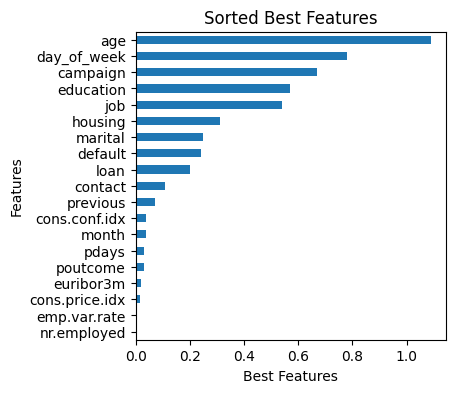

In [15]:
#Visualize sorted feature scores
names_scores = {'Names':m.columns, 'importance':r.w_} 
ns = pd.DataFrame(names_scores)
ns = ns.sort_values(by='importance')
ns

ns['importance'].plot(kind='barh',figsize=(4,4))
plt.ylabel('Features')
plt.xlabel('Best Features')
plt.yticks(np.arange(len(m.columns)), ns['Names'])
plt.title('Sorted Best Features')

In [16]:
s = np.array(ns['Names'])
b = np.flip(s)
print(b)

['age' 'day_of_week' 'campaign' 'education' 'job' 'housing' 'marital'
 'default' 'loan' 'contact' 'previous' 'cons.conf.idx' 'month' 'pdays'
 'poutcome' 'euribor3m' 'cons.price.idx' 'emp.var.rate' 'nr.employed']


In [17]:
idx_dic = {}
for col in df.columns:
    idx_dic[col] = df.columns.get_loc(col)
print(idx_dic)

{'age': 0, 'job': 1, 'marital': 2, 'education': 3, 'default': 4, 'housing': 5, 'loan': 6, 'contact': 7, 'month': 8, 'day_of_week': 9, 'campaign': 10, 'pdays': 11, 'previous': 12, 'poutcome': 13, 'emp.var.rate': 14, 'cons.price.idx': 15, 'cons.conf.idx': 16, 'euribor3m': 17, 'nr.employed': 18, 'y': 19}


In [18]:
cols_index = [df.columns.get_loc(col) for col in b]
print(cols_index)

X_test = X_test[:,cols_index]
X_test

[0, 9, 10, 3, 1, 5, 2, 4, 6, 7, 12, 16, 8, 11, 13, 17, 15, 14, 18]


array([[ 4.9000e+01,  2.0000e+00,  2.0000e+00, ...,  9.3918e+01,
         1.4000e+00,  5.2281e+03],
       [ 4.2000e+01,  0.0000e+00,  1.0000e+00, ...,  9.2893e+01,
        -1.8000e+00,  5.0991e+03],
       [ 5.3000e+01,  2.0000e+00,  2.0000e+00, ...,  9.3994e+01,
         1.1000e+00,  5.1910e+03],
       ...,
       [ 2.7000e+01,  0.0000e+00,  4.0000e+00, ...,  9.2893e+01,
        -1.8000e+00,  5.0991e+03],
       [ 3.6000e+01,  4.0000e+00,  1.0000e+00, ...,  9.3075e+01,
        -1.8000e+00,  5.0991e+03],
       [ 3.0000e+01,  2.0000e+00,  1.0000e+00, ...,  9.3444e+01,
         1.4000e+00,  5.2281e+03]])

In [19]:
def f_performance(classifier): 
  max_accuracy_features = max(classifier, key=classifier.get)
  print("No of feaures which gives best Accuracy", max_accuracy_features)
  print("Best Accuracy using selected features", classifier[max_accuracy_features])
  conf = matrix.get(max_accuracy_features)
  plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':80})

  # confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=conf)
  disp.plot()
  plt.show()

  # Performance - Sensitivity, Specificity, F1_score, Precision
  tn, fp, fn, tp = conf.ravel()

  spec = tn / (tn + fp)
  print("Specificity: ", spec)

  sens = tp / (tp + fn)
  print("Sensitivity", sens)

  PPV = tp/(tp+fp)
  print("Precision", PPV)

  f1_score = (2*PPV*sens)/(PPV+sens)
  print("F1_score",f1_score)

  print(AUC.get(max_accuracy_features))

SVM

In [16]:
SVM={}
matrix = {}
AUC = {}
model = SVC()
for i in range(1, 20):
  model.fit(relief_df[:, 0:i], y_train.ravel())
  y_pred_X_test= model.predict(X_test[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  SVM[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

In [17]:
SVM

{1: 0.8873512988589464,
 2: 0.8874726875455208,
 3: 0.8873512988589464,
 4: 0.8873512988589464,
 5: 0.8873512988589464,
 6: 0.8873512988589464,
 7: 0.8873512988589464,
 8: 0.8873512988589464,
 9: 0.8873512988589464,
 10: 0.8873512988589464,
 11: 0.8873512988589464,
 12: 0.8873512988589464,
 13: 0.8873512988589464,
 14: 0.8975479485311969,
 15: 0.8975479485311969,
 16: 0.8975479485311969,
 17: 0.8975479485311969,
 18: 0.8975479485311969,
 19: 0.8975479485311969}

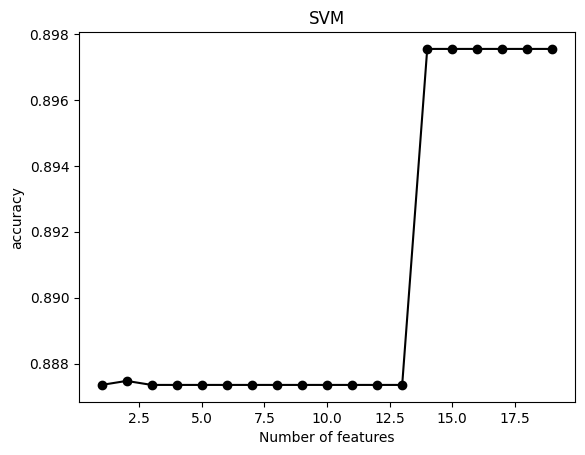

In [18]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
m = np.arange(1,20)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, SVM.values(), '-ok',)
plt.title("SVM")
plt.show()

No of feaures which gives best Accuracy 14
Best Accuracy using selected features 0.8975479485311969


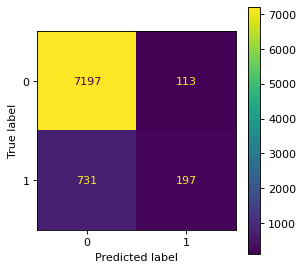

Specificity:  0.9845417236662106
Sensitivity 0.2122844827586207
Precision 0.635483870967742
F1_score 0.3182552504038772
0.5984131032124157


In [19]:
f_performance(SVM)

KMEANS

In [20]:
from sklearn.cluster import KMeans
KMEANS={}
matrix = {}
AUC = {}
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
for i in range(1, 20):
  kmeans.fit(relief_df[:, 0:i], y_train.ravel())
  y_pred_X_test= kmeans.predict(X_test[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  KMEANS[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

In [21]:
KMEANS

{1: 0.8349113862588007,
 2: 0.6071862102452051,
 3: 0.6071862102452051,
 4: 0.6071862102452051,
 5: 0.6071862102452051,
 6: 0.6071862102452051,
 7: 0.6071862102452051,
 8: 0.6071862102452051,
 9: 0.6071862102452051,
 10: 0.6071862102452051,
 11: 0.6073075989317795,
 12: 0.6073075989317795,
 13: 0.6073075989317795,
 14: 0.8975479485311969,
 15: 0.8975479485311969,
 16: 0.8975479485311969,
 17: 0.8975479485311969,
 18: 0.8975479485311969,
 19: 0.8975479485311969}

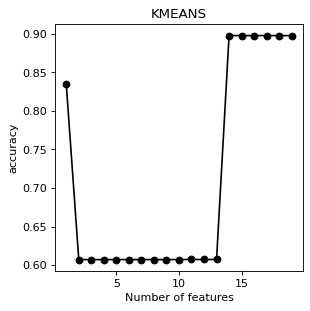

In [22]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
m = np.arange(1,20)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, KMEANS.values(), '-ok',)
plt.title("KMEANS")
plt.show()

No of feaures which gives best Accuracy 14
Best Accuracy using selected features 0.8975479485311969


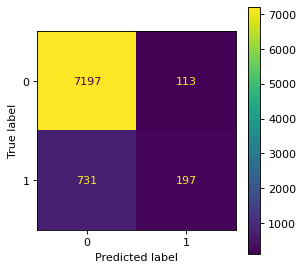

Specificity:  0.9845417236662106
Sensitivity 0.2122844827586207
Precision 0.635483870967742
F1_score 0.3182552504038772
0.5984131032124157


In [23]:
f_performance(KMEANS)

FCM

In [24]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from fcmeans import FCM
fcmModel = FCM(n_clusters=2, random_state=1)
FCMEANS={}
matrix = {}
AUC = {}
for i in range(1, 20):
  fcmModel.fit(relief_df[:, 0:i])
  y_pred_X_test= fcmModel.predict(X_test[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  FCMEANS[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

In [26]:
FCMEANS

{1: 0.18669579995144453,
 2: 0.6070648215586307,
 3: 0.6070648215586307,
 4: 0.6068220441854819,
 5: 0.5934692886622966,
 6: 0.5934692886622966,
 7: 0.5931051226025734,
 8: 0.5928623452294246,
 9: 0.5928623452294246,
 10: 0.5890992959456178,
 11: 0.5871570769604273,
 12: 0.5870356882738529,
 13: 0.5870356882738529,
 14: 0.10245205146880311,
 15: 0.10245205146880311,
 16: 0.10245205146880311,
 17: 0.10245205146880311,
 18: 0.10245205146880311,
 19: 0.7142510318038359}

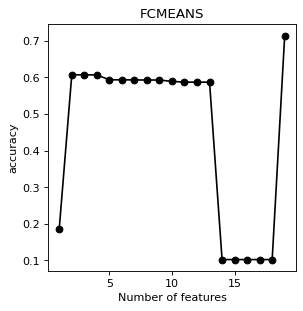

In [27]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
m = np.arange(1,20)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, FCMEANS.values(), '-ok',)
plt.title("FCMEANS")
plt.show()

No of feaures which gives best Accuracy 19
Best Accuracy using selected features 0.7142510318038359


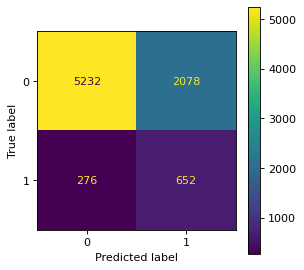

Specificity:  0.7157318741450068
Sensitivity 0.7025862068965517
Precision 0.23882783882783884
F1_score 0.35647895024603604
0.7091590405207793


In [28]:
f_performance(FCMEANS)

AdaBoostClassifier

In [29]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abcModel = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
AdaBoost= {}
matrix = {}
AUC = {}

for i in range(1, 20):
  abcModel.fit(relief_df[:, 0:i], y_train)
  y_pred_X_test= abcModel.predict(X_test[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  AdaBoost[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

In [30]:
AdaBoost

{1: 0.8873512988589464,
 2: 0.8869871327992231,
 3: 0.887229910172372,
 4: 0.8867443554260743,
 5: 0.885773245933479,
 6: 0.8862588006797767,
 7: 0.8861374119932023,
 8: 0.8855304685603301,
 9: 0.8855304685603301,
 10: 0.8861374119932023,
 11: 0.8861374119932023,
 12: 0.8914785142024764,
 13: 0.8915999028890508,
 14: 0.9003398883224083,
 15: 0.9003398883224083,
 16: 0.8996115562029618,
 17: 0.9009468317552805,
 18: 0.9003398883224083,
 19: 0.9002184996358339}

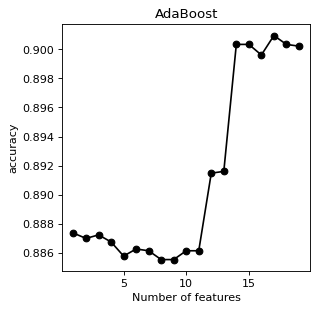

In [31]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
m = np.arange(1,20)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, AdaBoost.values(), '-ok',)
plt.title("AdaBoost")
plt.show()

No of feaures which gives best Accuracy 17
Best Accuracy using selected features 0.9009468317552805


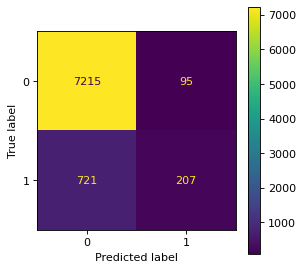

Specificity:  0.9870041039671683
Sensitivity 0.22306034482758622
Precision 0.6854304635761589
F1_score 0.33658536585365856
0.6050322243973772


In [32]:
f_performance(AdaBoost)

GradientBoostingClassifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
# Create adaboost classifer object
gbc=GradientBoostingClassifier(n_estimators=50,learning_rate=0.05)

GradientBoost= {}
matrix = {}
AUC = {}

for i in range(1, 20):
  gbc.fit(relief_df[:, 0:i], y_train)
  y_pred_X_test= gbc.predict(X_test[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  GradientBoost[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

In [34]:
GradientBoost

{1: 0.8873512988589464,
 2: 0.8871085214857976,
 3: 0.887229910172372,
 4: 0.8869871327992231,
 5: 0.8874726875455208,
 6: 0.8874726875455208,
 7: 0.8874726875455208,
 8: 0.887229910172372,
 9: 0.887229910172372,
 10: 0.8874726875455208,
 11: 0.8897790725904345,
 12: 0.8914785142024764,
 13: 0.8915999028890508,
 14: 0.8998543335761107,
 15: 0.8994901675163874,
 16: 0.8982762806506434,
 17: 0.8986404467103666,
 18: 0.8982762806506434,
 19: 0.8975479485311969}

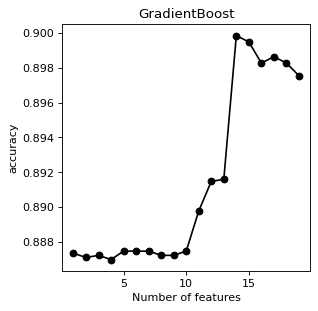

In [35]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
m = np.arange(1,20)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, GradientBoost.values(), '-ok',)
plt.title("GradientBoost")
plt.show()

No of feaures which gives best Accuracy 14
Best Accuracy using selected features 0.8998543335761107


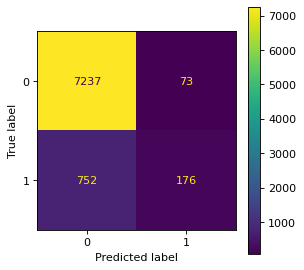

Specificity:  0.9900136798905609
Sensitivity 0.1896551724137931
Precision 0.7068273092369478
F1_score 0.29906542056074764
0.5898344261521771


In [36]:
f_performance(GradientBoost)

In [37]:
from xgboost import XGBClassifier
        
xgb_clf = XGBClassifier(n_estimators=50,learning_rate=0.05)

XGBoost= {}
matrix = {}
AUC = {}

for i in range(1, 20):
  xgb_clf.fit(relief_df[:, 0:i], y_train)
  y_pred_X_test= xgb_clf.predict(X_test[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  XGBoost[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

In [38]:
XGBoost

{1: 0.8873512988589464,
 2: 0.8860160233066279,
 3: 0.8865015780529255,
 4: 0.8874726875455208,
 5: 0.8868657441126487,
 6: 0.8865015780529255,
 7: 0.8863801893663511,
 8: 0.8860160233066279,
 9: 0.8861374119932023,
 10: 0.8874726875455208,
 11: 0.892571012381646,
 12: 0.8922068463219228,
 13: 0.8939062879339645,
 14: 0.898761835396941,
 15: 0.8988832240835154,
 16: 0.9009468317552805,
 17: 0.9005826656955572,
 18: 0.9013109978150037,
 19: 0.9021607186210245}

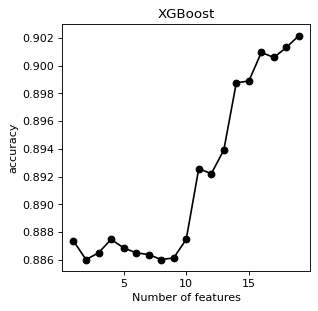

In [39]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
m = np.arange(1,20)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, XGBoost.values(), '-ok',)
plt.title("XGBoost")
plt.show()

No of feaures which gives best Accuracy 19
Best Accuracy using selected features 0.9021607186210245


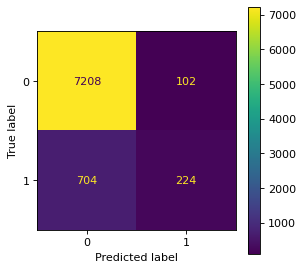

Specificity:  0.986046511627907
Sensitivity 0.2413793103448276
Precision 0.6871165644171779
F1_score 0.3572567783094099
0.6137129109863673


In [40]:
f_performance(XGBoost)

In [41]:
cycol = cycle('bgrcmk')
def plot_combined_accuracy():
    m=np.arange(1,20)
    plt.xlabel("Features",fontsize=18)
    plt.ylabel("accuracy",fontsize=18)
    plt.plot(SVM.keys(), SVM.values(), c=next(cycol), label="SVM");
    plt.plot(KMEANS.keys(), KMEANS.values(),  c=next(cycol), label="KMEANS");
    plt.plot(AdaBoost.keys(), AdaBoost.values(),  c=next(cycol), label="AdaBoost");
    plt.plot(GradientBoost.keys(), GradientBoost.values(),  c=next(cycol), label="GradientBoost");
    plt.plot(XGBoost.keys(), XGBoost.values(),  c=next(cycol), label="XGBoost");
    plt.legend()
    plt.show()

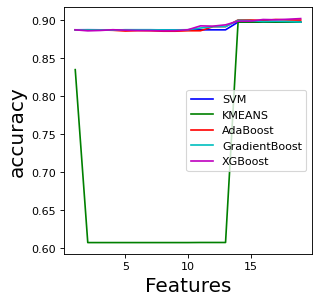

In [42]:
plot_combined_accuracy()

HMM

In [ ]:
class0 = df[df['y'] == 0]
class1 = df[df['y'] == 1]

x_class0 = class0.drop('y', axis=1)
y_class0 = class0[['y']]
x_class0

x_class1 = class1.drop('y', axis=1)
y_class1 = class1[['y']]
x_class1

x_trainc0, x_testc0, y_trainc0, y_testc0 = train_test_split(x_class0, y_class0, test_size=0.2, random_state=0)
x_trainc1, x_testc1, y_trainc1, y_testc1  = train_test_split(x_class1, y_class1, test_size=0.2, random_state=0)

model0=GaussianHMM(n_components=1, algorithm="viterbi", covariance_type = "diag",random_state=21, n_iter = 30)
model1=GaussianHMM(n_components=1, algorithm="viterbi", covariance_type = "diag",random_state=21, n_iter = 30)

x_test = np.concatenate((x_testc0, x_testc1))
y_test = np.concatenate((y_testc0, y_testc1))

pred_prob0 = model0.predict_proba(x_test)
pred_prob1 = model1.predict_proba(x_test)

predict_proba_c0 = np.max(model0.predict_proba(x_test), axis=1)
predict_proba_c1 = np.max(model1.predict_proba(x_test), axis=1)

pred_prob = np.column_stack((predict_proba_c0,predict_proba_c1,predict_proba_c2,predict_proba_c0))

In [20]:
HMM= {}
matrix = {}
AUC = {}

for i in range(1, 20):
  model0.fit(relief_df[:, 0:i], y_train)
  y_pred_X_test= model0.predict(X_test[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  HMM[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

HMM

{1: 0.8865015780529255,
 2: 0.8861374119932023,
 3: 0.8866229667394999,
 4: 0.887229910172372,
 5: 0.887229910172372,
 6: 0.887229910172372,
 7: 0.8869871327992231,
 8: 0.8866229667394999,
 9: 0.8868657441126487,
 10: 0.8875940762320952,
 11: 0.888443797038116,
 12: 0.8892935178441369,
 13: 0.8888079630978393,
 14: 0.8971837824714737,
 15: 0.8971837824714737,
 16: 0.898154891964069,
 17: 0.898761835396941,
 18: 0.8983976693372178,
 19: 0.8992473901432386}

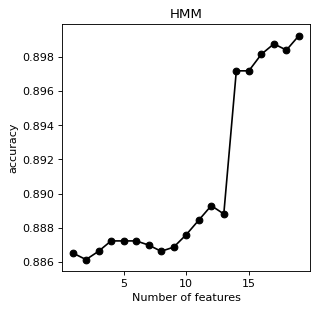

In [23]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
m = np.arange(1,20)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, HMM.values(), '-ok',)
plt.title("HMM")
plt.show()

No of feaures which gives best Accuracy 19
Best Accuracy using selected features 0.8992473901432386


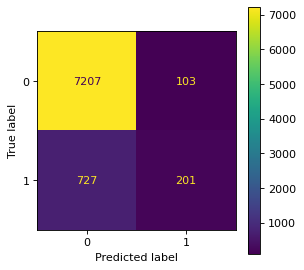

Specificity:  0.9859097127222982
Sensitivity 0.2165948275862069
Precision 0.6611842105263158
F1_score 0.3262987012987013
0.6012522701542525


In [22]:
f_performance(HMM)